# Clustering Models
## Hierarchial methods
#### Setting up for clustering analysis

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [2]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [3]:
# Number of digits of precision for floating point output (default 8). 
# May be None if floatmode is not fixed, to print as many digits as necessary to uniquely specify the value.

# suppress -> If True, always print floating point numbers using fixed point notation, 
# in which case numbers equal to zero in the current precision will print as zero. 

# suppress -> If False, then scientific notation is used when absolute value of the smallest number is < 1e-4 or 
# the ratio of the maximum absolute value to the minimum is > 1e3. The default is False.
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [4]:
address = 'mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

# dataset
X = cars[['mpg', 'disp', 'hp', 'wt']].values

# target -> car has an automatic/manual transmission, col position 9
y = cars.iloc[:,(9)].values

### Using scipy to generate dendrograms

In [6]:
# 'ward' as linkage method
# Z is the clustering result that has been generated from scipy's hierarchical clustering algorithm
Z = linkage(X, 'ward')

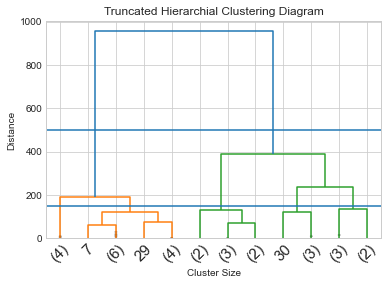

In [7]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# set a line for y-axis, to count how many clusters to use in our model, 
# it helps you get an accurate count of the predicted number of clusters
plt.axhline(y=500) # ax horizontal line
plt.axhline(y=150)
plt.show()

# goal is to pick an approximate number of subgroups

## Generating hierarchical clusters

In [8]:
# pick 2 as the number of clusters to use in our model
# it says that we have a distance between data points and its nearest neighbors and that distance should be set at a maxi of 400
# this is because there are 2 clusters in the model

# we're gonna say we want a max distance betweend ata point of 500, with 500 set as our max distance between nearest neighbors

k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

# generate accuracy score
sm.accuracy_score(y, Hclustering.labels_)

# note:
# manhattan was provided as affinity. Ward can only work with euclidean distances.

0.78125

In [9]:
# Hclustering -> clustering object
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [10]:
# deploy each and every different type of combination of parameters that are possible with this dataset to see the best results
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

# best scoring

0.71875